In [97]:
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
import json
import pandas as pd
from textblob import TextBlob

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = list()
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        
        statuses_count = [i['user']['statuses_count'] for i in self.tweets_list]
        return statuses_count
        
    def find_full_text(self)->list:
        text = list()
        for i in self.tweets_list:
            if 'retweeted_status' in i.keys() and 'extended_tweet' in i['retweeted_status'].keys():
                text_i=append(i['retweeted_status']['extended_tweet']['full_text'])
                text.append(text_i)
            else: text.append('Nothing') 
        return text
       
    
    def find_sentiments(self, text)->list:
        polarity=list()
        subjectivity = list()
        for i in text:
            sent = TextBlob(i)
            sentiment = sent.sentiment
            polarity.append(sentiment.polarity)
            subjectivity.append(sentiment.subjectivity)
        
        return polarity, subjectivity

    def find_created_time(self)->list:

        created_at = [i['created_at'] for i in self.tweets_list]

        return created_at

    def find_source(self)->list:
        source = [i['source'] for i in self.tweets_list]

        return source

    def find_screen_name(self)->list:
        screen_name = [i['user']['screen_name'] for i in self.tweets_list]

        return screen_name

    def find_followers_count(self)->list:
        followers_count = [i['user']['followers_count'] for i in self.tweets_list]

        return followers_count

    def find_friends_count(self)->list:
        friends_count = [i['user']['friends_count'] for i in self.tweets_list]

        return friends_count

    def is_sensitive(self)->list:
        
        try:
            is_sensitive=list() 
            for i in self.tweets_list:
                if 'possibly_sensitive' in i.keys():
                    is_sensitive.append(i['possibly_sensitive'])
                else:
                    is_sensitive.append(0)
                
        except KeyError:
            is_sensitive = None

        return is_sensitive

    def find_favourite_count(self)->list:

        favorite_count = list()
        for i in self.tweets_list:
            if 'retweeted_status' in i.keys():
                fav=(i['retweeted_status']['favorite_count'])
                favorite_count.append(fav)
            else:
                favorite_count.append(0)

        return favorite_count
    
    def find_retweet_count(self)->list:
        
        retweet_count =list()
        for i in self.tweets_list:
            if 'retweeted_status' in i.keys():
                retweeted=i['retweeted_status']['retweet_count']
                retweet_count.append(retweeted)
            else:
                retweet_count.append(0)

        return retweet_count

    def find_hashtags(self)->list:
        hashtags = list()

        for k in self.tweets_list:
            tag=", ".join([hashtag_item['text'] for hashtag_item in k['entities']['hashtags']])
            hashtags.append(tag)
        return hashtags

    def find_mentions(self)->list:
        mentions = list()
        for k in self.tweets_list:
            mention= ", ".join([mention['screen_name'] for mention in k['entities']['user_mentions']])
            mentions.append(mention)

        return mentions


    def find_location(self)->list:
        try:
            location = self.tweets_list['user']['location']
        except TypeError:
            location = ''
        
        return location

    def find_lang(self)->list:
        lang = [x['lang'] for x in self.tweets_list]

        return lang

    
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = {"created_at":created_at,'source':source,'original_text':text,'polarity':polarity,'subjectivity':subjectivity,
                'lang':lang,'favorite_count':fav_count,'retweet_count':retweet_count,'original_author':screen_name, 
                'followers_count':follower_count,'friends_count':friends_count,'possibly_sensitive':sensitivity,
                'hashtags':hashtags,'user_mentions':mentions}
        df = pd.DataFrame(data=data, columns=columns)

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
       
        return df

                
if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    _, tweet_list = read_json("Economic_Twitter_Data.json")

    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 
    # use all defined functions to generate a dataframe with the specified columns above
    # from the fix_bug branch

tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Nothing,0.0,0.0,de,2356,355,McMc74078966,3,12,0,,nikitheblogger,NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Nothing,0.0,0.0,de,1985,505,McMc74078966,3,12,0,,sagt_mit,NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Nothing,0.0,0.0,de,16,4,McMc74078966,3,12,0,,"Kryptonoun, WRi007",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Nothing,0.0,0.0,de,1242,332,McMc74078966,3,12,0,"Deutschen, Spritpreisen, inflation, Abgaben",WRi007,NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Nothing,0.0,0.0,de,1329,386,McMc74078966,3,12,0,,RolandTichy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24620,Fri Apr 22 14:44:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Nothing,0.0,0.0,mr,2342,242,kitukalesatya,706,643,0,,waglenikhil,NaN
24621,Fri Apr 22 14:44:44 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Nothing,0.0,0.0,hi,2298,242,kitukalesatya,706,643,0,,yadavtejashwi,NaN
24622,Fri Apr 22 14:44:35 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Nothing,0.0,0.0,en,1025,203,kitukalesatya,706,643,0,,Parthtiwari25,NaN
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",Nothing,0.0,0.0,hi,3735,301,kitukalesatya,706,643,0,,news24tvchannel,NaN


In [8]:
class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self, df:pd.DataFrame):
        self.df = df
        print('Automation in Action...!!!')
        
    def drop_unwanted_column(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove rows that has column names. This error originated from
        the data collection stage.  
        """
        unwanted_rows = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(unwanted_rows , inplace=True)
        df = df[df['polarity'] != 'polarity']
        
        return df
    def drop_duplicate(self, df:pd.DataFrame)->pd.DataFrame:
        """
        drop duplicate rows
        """
        self.df = self.df.drop_duplicates()
        return df
    def convert_to_datetime(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert column to datetime
        """
        self.df['created_at'] = pd.to_datetime(self.df['created_at'])

        self.df = self.df[self.df['created_at'] >= '2020-12-31' ]
        
        df = df[df['created_at'] >= '2020-12-31' ]
        
        return df
    def convert_to_numbers(self, df:pd.DataFrame)->pd.DataFrame:
            """
            convert columns like polarity, subjectivity, retweet_count
            favorite_count etc to numbers
            """
            self.df['polarity'] = pd.to_numeric(self.df['polarity'])

            self.df['retweet_count'] = pd.to_numeric(self.df['retweet_count'])
            self.df['favorite_count'] = pd.to_numeric(self.df['favorite_count'])

            return df
    
    def remove_non_english_tweets(self, df:pd.DataFrame)->pd.DataFrame:
        """
        remove non english tweets from lang
        """
        
        df = self.df.query("lang == 'en' ")
        
        return df
    

In [89]:
sampled_data =tweet_df

In [90]:
unwanted_rows = sampled_data[sampled_data['retweet_count'] == 'retweet_count' ].index
sampled_data.drop(unwanted_rows , inplace=True)
sampled_data['created_at'] = pd.to_datetime(sampled_data['created_at'])
sampled_data['retweet_count'] = pd.to_numeric(sampled_data['retweet_count'])
sampled_data['favorite_count'] = pd.to_numeric(sampled_data['favorite_count'])
sampled_data =sampled_data.query("lang == 'en' ")

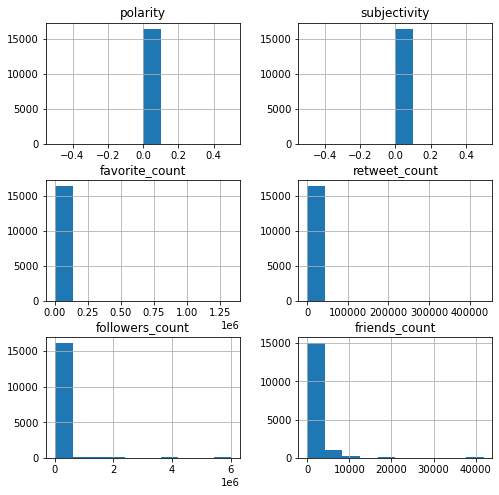

In [91]:
sampled_data.select_dtypes(include='number').hist(bins=10,figsize=(8,8))
plt.show()

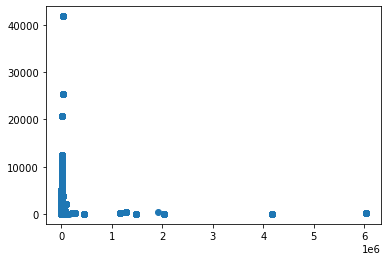

In [92]:
plt.scatter(sampled_data['followers_count'],sampled_data['friends_count'])
plt.show()

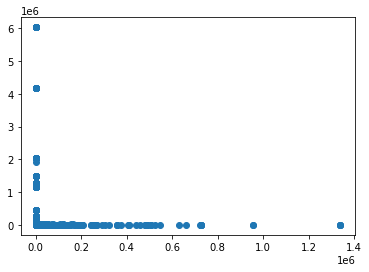

In [93]:
plt.scatter(sampled_data['favorite_count'],sampled_data['followers_count'])
plt.show()

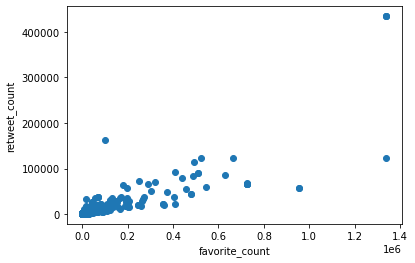

In [102]:
plt.scatter(sampled_data['favorite_count'],sampled_data['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

In [95]:
len_autor=[]
names=[]
for i in sampled_data['original_author'].unique():
    author=sampled_data[sampled_data['original_author']==i]
    len_autor.append(len(author))
    names.append(i)
    
    
lengthdf=pd.DataFrame(len_autor,names,columns=['each author tweet count']) 
lengthdf

,each author tweet count
davideiacovozzi,43
MercuryReports,49
MaatWes,50
gfliverpool9966,42
ZoeyZoeAz,45
...,...
allannatividad8,11
gordontheglue,49
ibrahimpatel007,20
RosieG1029,10


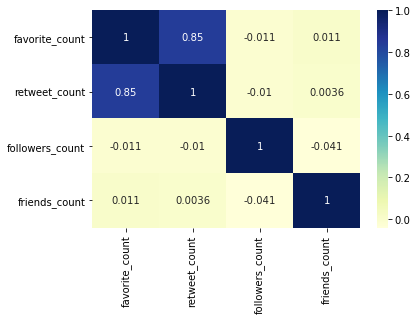

In [101]:
sb.heatmap(sampled_data[['favorite_count','retweet_count','followers_count','friends_count']].corr(), cmap="YlGnBu", annot=True)
plt.show()